# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 601


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # pause for 1 second using time.sleep() - avoids the OpenWeather API key from being disabled
        time.sleep(1)

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | santa ana de yacuma
Processing Record 2 of Set 1 | edinburgh of the seven seas
Processing Record 3 of Set 1 | imbituba
Processing Record 4 of Set 1 | peace river
Processing Record 5 of Set 1 | port-aux-francais
Processing Record 6 of Set 1 | badger
Processing Record 7 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 8 of Set 1 | papatowai
Processing Record 9 of Set 1 | bethel
Processing Record 10 of Set 1 | anjozorobe
Processing Record 11 of Set 1 | hermanus
Processing Record 12 of Set 1 | waitangi
Processing Record 13 of Set 1 | mahibadhoo
Processing Record 14 of Set 1 | iskateley
Processing Record 15 of Set 1 | kidal
Processing Record 16 of Set 1 | whitehorse
Processing Record 17 of Set 1 | thompson
Processing Record 18 of Set 1 | tiksi
Processing Record 19 of Set 1 | opuwo
Processing Record 20 of Set 1 | keflavik
Processing Record 21 of Set 1 | jember
Processing Recor

Processing Record 25 of Set 8 | torrington
Processing Record 26 of Set 8 | krutikha
Processing Record 27 of Set 8 | bonavista
Processing Record 28 of Set 8 | zaysan
Processing Record 29 of Set 8 | mana
Processing Record 30 of Set 8 | nemuro
Processing Record 31 of Set 8 | mandera
Processing Record 32 of Set 8 | numan
Processing Record 33 of Set 8 | pingliang
Processing Record 34 of Set 8 | saldanha
Processing Record 35 of Set 8 | petropavlovsk-kamchatskiy
Processing Record 36 of Set 8 | vila velha
Processing Record 37 of Set 8 | bengkulu
Processing Record 38 of Set 8 | honiara
Processing Record 39 of Set 8 | pemba
Processing Record 40 of Set 8 | viligili
City not found. Skipping...
Processing Record 41 of Set 8 | ahipara
Processing Record 42 of Set 8 | shingu
Processing Record 43 of Set 8 | bargal
City not found. Skipping...
Processing Record 44 of Set 8 | korla
Processing Record 45 of Set 8 | lerik
Processing Record 46 of Set 8 | quelimane
Processing Record 47 of Set 8 | katyuzhanka
P

Processing Record 14 of Set 12 | nsanje
Processing Record 15 of Set 12 | xuchang
Processing Record 16 of Set 12 | todos santos
Processing Record 17 of Set 12 | kuhestan
City not found. Skipping...
Processing Record 18 of Set 12 | bataipora
Processing Record 19 of Set 12 | tateyama
Processing Record 20 of Set 12 | wajima
Processing Record 21 of Set 12 | pokosnoye
Processing Record 22 of Set 12 | waipawa
Processing Record 23 of Set 12 | yaring
Processing Record 24 of Set 12 | isiro
Processing Record 25 of Set 12 | chivilcoy
Processing Record 26 of Set 12 | mandalgovi
Processing Record 27 of Set 12 | nicoya
Processing Record 28 of Set 12 | novocheremshansk
Processing Record 29 of Set 12 | emirdag
Processing Record 30 of Set 12 | nouadhibou
Processing Record 31 of Set 12 | tongliao
Processing Record 32 of Set 12 | ryomgard
Processing Record 33 of Set 12 | khudumelapye
Processing Record 34 of Set 12 | talcahuano
Processing Record 35 of Set 12 | gifhorn
Processing Record 36 of Set 12 | bilma

In [23]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          573
Lat           573
Lng           573
Max Temp      573
Humidity      573
Cloudiness    573
Wind Speed    573
Country       573
Date          573
dtype: int64

In [24]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,santa ana de yacuma,-13.7500,-65.4333,80.55,83,75,11.50,BO,1733585552
1,edinburgh of the seven seas,-37.0676,-12.3116,60.37,89,84,18.70,SH,1733585553
2,imbituba,-28.2400,-48.6703,66.99,94,100,10.87,BR,1733585554
3,peace river,56.2501,-117.2860,30.65,98,100,11.50,CA,1733585555
4,port-aux-francais,-49.3500,70.2167,41.50,77,87,16.58,TF,1733585556


In [25]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [26]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,santa ana de yacuma,-13.7500,-65.4333,80.55,83,75,11.50,BO,1733585552
1,edinburgh of the seven seas,-37.0676,-12.3116,60.37,89,84,18.70,SH,1733585553
2,imbituba,-28.2400,-48.6703,66.99,94,100,10.87,BR,1733585554
3,peace river,56.2501,-117.2860,30.65,98,100,11.50,CA,1733585555
4,port-aux-francais,-49.3500,70.2167,41.50,77,87,16.58,TF,1733585556


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

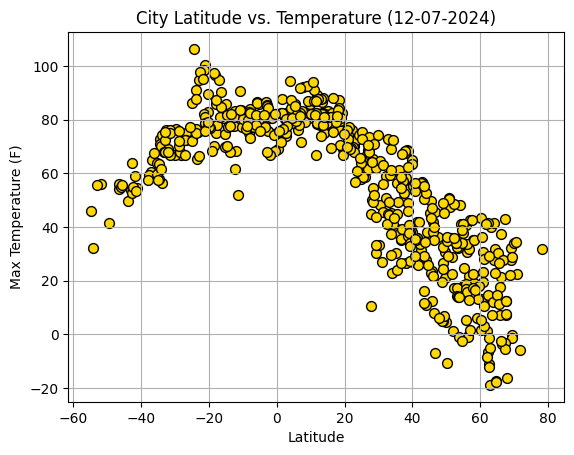

In [27]:
# Build scatter plot for latitude vs. temperature
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Max Temp"],
    color="gold",
    edgecolor="black",
    linewidths=1,  # Corrected from 'lindwidths' to 'linewidths'
    marker="o",    # Corrected from 'marker-"o"' to 'marker="o"'
    label="Cities",
    s=50
)

# Incorporate the other graph properties
plt.title("City Latitude vs. Temperature (%s)" % time.strftime("%m-%d-%Y"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

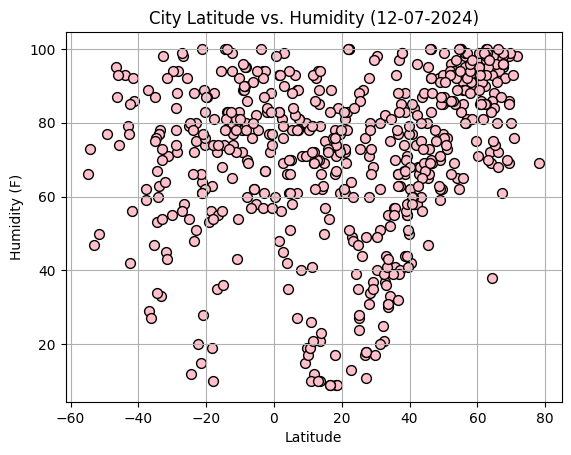

In [28]:
# Build scatter plot for latitude vs. temperature
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Humidity"],
    color="pink",
    edgecolor="black",
    linewidths=1, 
    marker="o",  
    label="Cities",
    s=50
)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%m-%d-%Y"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (F)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

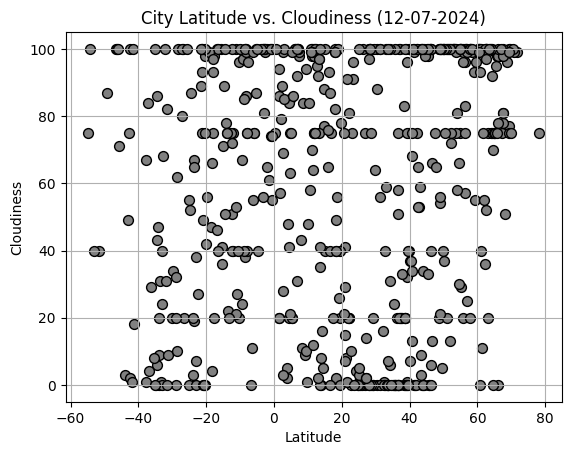

In [29]:
# Build scatter plot for latitude vs. temperature
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Cloudiness"],
    color="gray",
    edgecolor="black",
    linewidths=1,  # Corrected from 'lindwidths' to 'linewidths'
    marker="o",    # Corrected from 'marker-"o"' to 'marker="o"'
    label="Cities",
    s=50
)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%m-%d-%Y"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

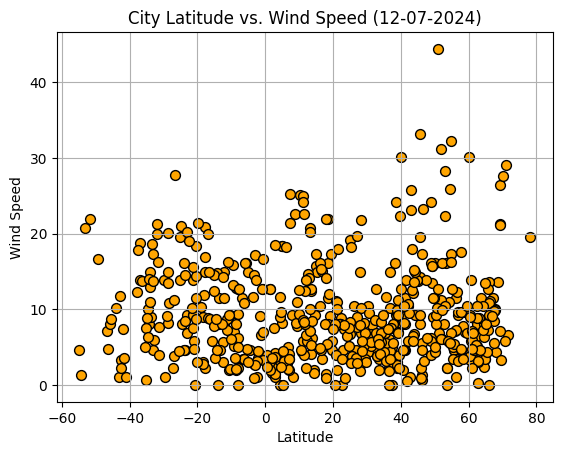

In [30]:
# Build scatter plot for latitude vs. temperature
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Wind Speed"],
    color="orange",
    edgecolor="black",
    linewidths=1,  # Corrected from 'lindwidths' to 'linewidths'
    marker="o",    # Corrected from 'marker-"o"' to 'marker="o"'
    label="Cities",
    s=50
)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%m-%d-%Y"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [35]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates, color):

    # Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))

    # Plot
    plt.scatter(x_values,y_values, color=color, edgecolor="black", s=50)
    plt.plot(x_values,regress_values, "r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [36]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,peace river,56.2501,-117.2860,30.65,98,100,11.50,CA,1733585555
5,badger,64.8000,-147.5333,14.36,88,75,3.44,US,1733585557
7,bethel,41.3712,-73.4140,35.69,58,100,11.50,US,1733585531
11,mahibadhoo,3.7833,72.9667,82.83,66,2,3.11,MV,1733585565
12,iskateley,67.6803,53.1512,12.49,95,81,9.98,RU,1733585566


In [37]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,santa ana de yacuma,-13.7500,-65.4333,80.55,83,75,11.50,BO,1733585552
1,edinburgh of the seven seas,-37.0676,-12.3116,60.37,89,84,18.70,SH,1733585553
2,imbituba,-28.2400,-48.6703,66.99,94,100,10.87,BR,1733585554
4,port-aux-francais,-49.3500,70.2167,41.50,77,87,16.58,TF,1733585556
6,papatowai,-46.5619,169.4708,54.16,95,100,7.18,NZ,1733585560


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7626008312508145


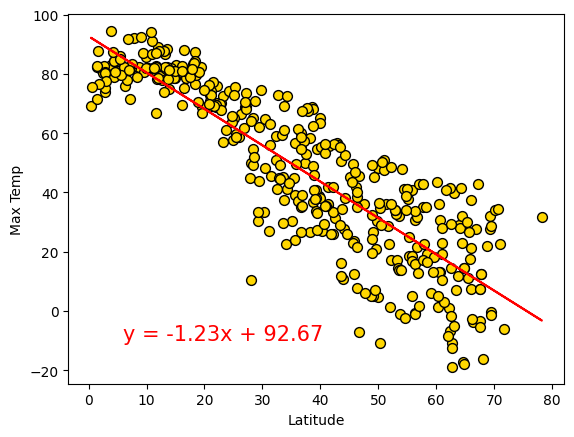

In [38]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp",(6,-10), "gold")

The r-value is: 0.4234613584937884


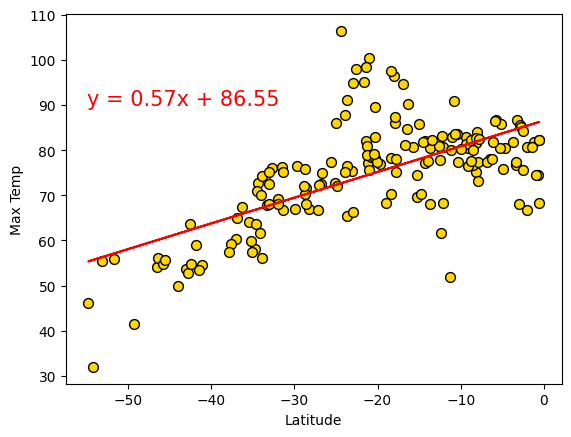

In [41]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp",(-55,90), "gold")

**Discussion about the linear relationship:** The high r value indicates a strong positive correlation between latitude and max temperature. R values ~ 0.4 indicate that there is a weak postive correlation in the southern hemisphere (due to the season).

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.1635890268833469


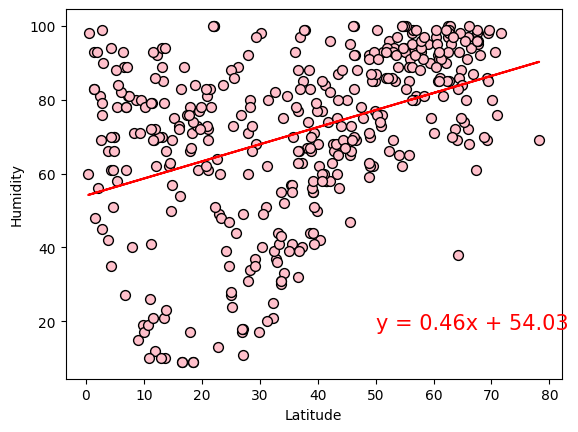

In [43]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity",(50,18), "pink")

The r-value is: 0.028659571176188534


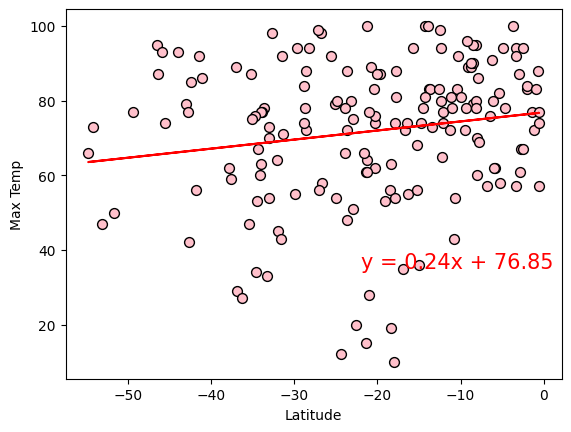

In [44]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Max Temp",(-22,35), "pink")

**Discussion about the linear relationship:** The low r values indicate a weak to no relationship between humidity and latitude.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.049851837772799217


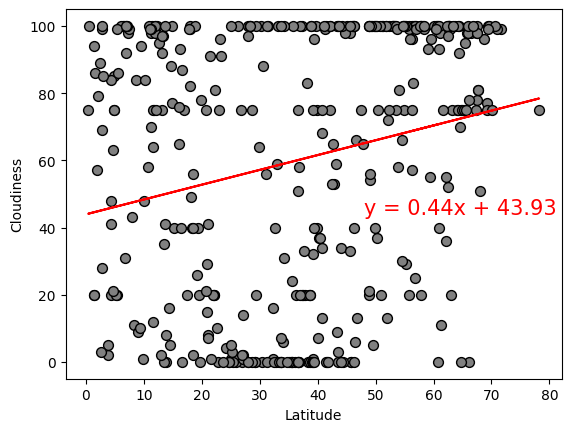

In [50]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness",(48,44), "gray")

The r-value is: 0.08544268441028971


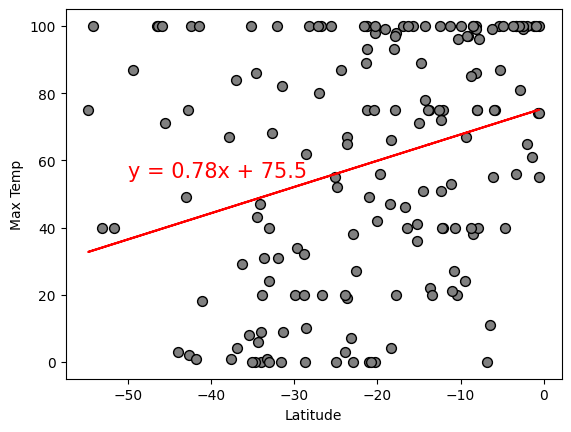

In [53]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Max Temp",(-50,55), "gray")

**Discussion about the linear relationship:** The low r values indicate a weak positive relationship between latitude and cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.006934823044813589


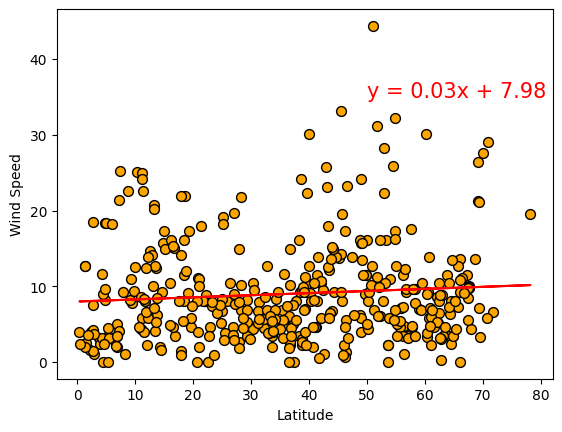

In [55]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed",(50,35), "orange")

The r-value is: 0.018257937720802683


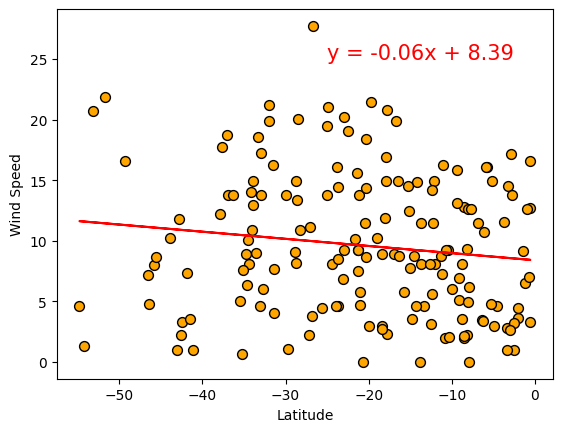

In [64]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed",(-25,25), "orange")

**Discussion about the linear relationship:** The low r values indicate that there is no real relationship between wind speed and latitude.